# Sona Thapa : C0909929

In [ ]:
# Installing necessary Requirements

! pip install tensorflow
! pip install keras
!pip install scikeras[tensorflow]
! pip install scikit-learn


In [ ]:
# Importing Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
# Load and Explore the Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Dataset structure
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Number of classes:", len(class_names))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


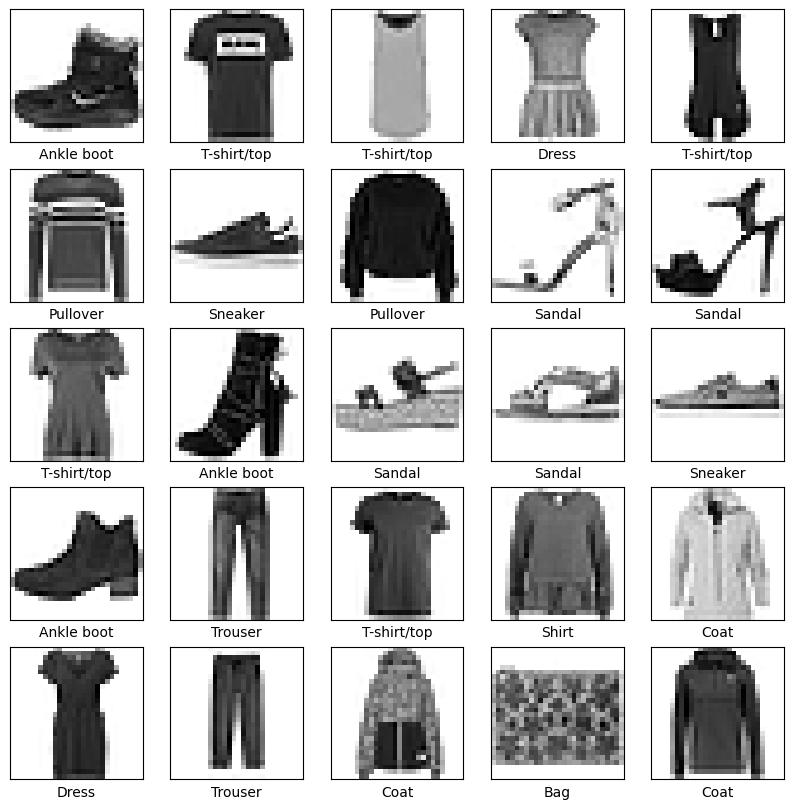

In [ ]:
# Display sample images from the dataset
# This helps to visually inspect the dataset and understand what kind of images it contains.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Explore dataset statistics
# Print the distribution of labels to understand if the dataset is balanced.
print("Training label distribution:", np.bincount(train_labels))
print("Test label distribution:", np.bincount(test_labels))

Training label distribution: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Test label distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


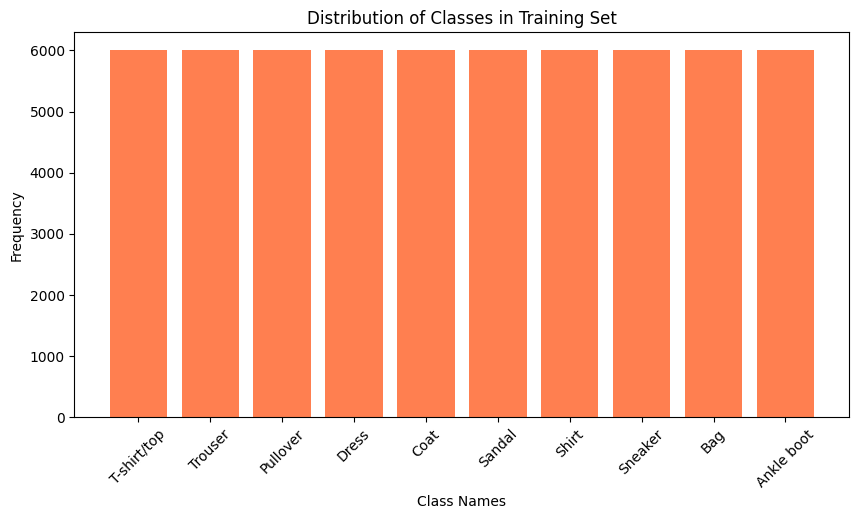

In [ ]:
# Plot distribution of classes in the training set
# Visualize how many examples of each class are present in the dataset.
plt.figure(figsize=(10, 5))
plt.bar(class_names, np.bincount(train_labels), color='coral')  # Changed color to coral
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in Training Set')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Data Preprocessing
# Normalize pixel values to be between 0 and 1 for better training performance.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Split the training data into training and validation sets
# This split helps to evaluate the model on unseen data during training.
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# BEFORE TUNING
# Build an Artificial Neural Network
# Define a basic ANN with two hidden layers and dropout for regularization.
initial_model = Sequential([
    Flatten(input_shape=(28, 28)), # Flatten the input images from 28x28 to 1D
    Dense(256, activation='relu'), # First hidden layer with 256 units
    Dropout(0.3), # Dropout to prevent overfitting
    Dense(128, activation='relu'), # Second hidden layer with 128 units
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(10, activation='softmax') # Output layer with 10 units (one for each class
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the Model
# Use 'adam' optimizer and 'sparse_categorical_crossentropy' as the loss function for multi-class classification.
initial_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Train the Model
# Train the model for 10 epochs and validate on the validation set.
initial_history = initial_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7179 - loss: 0.7818 - val_accuracy: 0.8447 - val_loss: 0.4191
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8355 - loss: 0.4521 - val_accuracy: 0.8563 - val_loss: 0.3887
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8520 - loss: 0.4073 - val_accuracy: 0.8660 - val_loss: 0.3676
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8599 - loss: 0.3892 - val_accuracy: 0.8630 - val_loss: 0.3614
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8608 - loss: 0.3804 - val_accuracy: 0.8671 - val_loss: 0.3548
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8681 - loss: 0.3619 - val_accuracy: 0.8728 - val_loss: 0.3575
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8689 - loss: 0.3551 - val_accuracy: 0.8723 - val_loss: 0.3575
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8746 - loss: 0.3365 - 

In [ ]:
# Evaluate the Model
# Evaluate the model's performance on the validation set.
initial_val_loss, initial_val_accuracy = initial_model.evaluate(val_images, val_labels)
print(f"Initial Validation Accuracy: {initial_val_accuracy:.2f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8842 - loss: 0.3186
Initial Validation Accuracy: 0.88


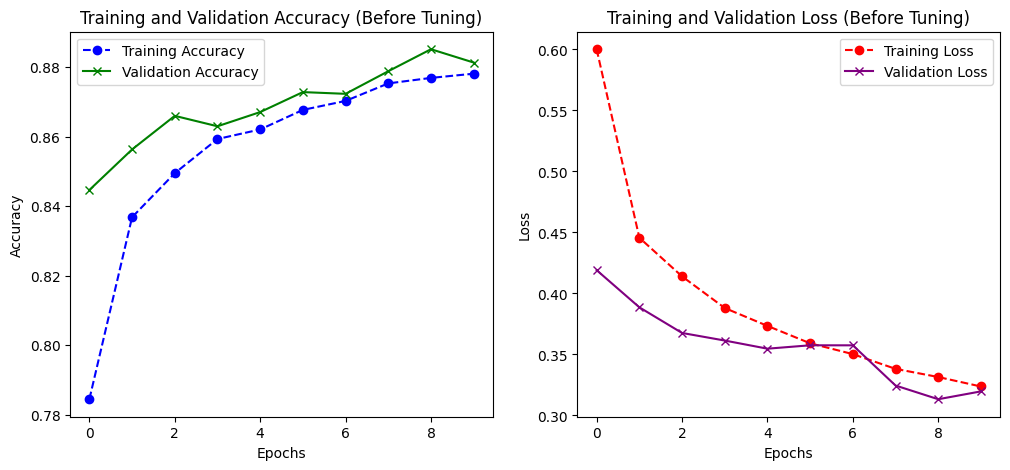

In [ ]:
# Visualize Training and Validation Loss/Accuracy (Before Tuning)
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(initial_history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', marker='o')
plt.plot(initial_history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Before Tuning)')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(initial_history.history['loss'], label='Training Loss', color='red', linestyle='--', marker='o')
plt.plot(initial_history.history['val_loss'], label='Validation Loss', color='purple', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Before Tuning)')

plt.show()

In [ ]:
# HYPERPARAMETER TUNING
# Function to build the model for hyperparameter tuning
# This function allows different hyperparameters to be tested using GridSearchCV.
def build_model(optimizer='adam', dropout_rate=0.3, units=128):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units, activation='relu'),  # First hidden layer with variable units
        Dropout(dropout_rate), # Dropout to prevent overfitting
        Dense(units // 2, activation='relu'),  # Second hidden layer with half the units
        Dropout(dropout_rate), # Dropout to prevent overfitting
        Dense(10, activation='softmax') # Output layer with 10 units (one for each class)
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model for use with GridSearchCV
# KerasClassifier is used to wrap the Keras model for compatibility with scikit-learn's GridSearchCV.
model = KerasClassifier(build_fn=build_model, verbose=0, dropout_rate=0.3, units=128)

In [ ]:
# Define hyperparameters to tune
# Define a grid of hyperparameters to search for the best model.
param_grid = {
    'units': [128, 256],
    'dropout_rate': [0.3, 0.5],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

In [ ]:
# Perform Grid Search
# Use GridSearchCV to find the best combination of hyperparameters.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Print the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8868125 using {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'optimizer': 'rmsprop', 'units': 256}


In [20]:
# Build and Train the Best Model
# Use the best hyperparameters found by GridSearchCV to build the final model.
best_params = grid_result.best_params_
final_model = build_model(optimizer=best_params['optimizer'],
                          dropout_rate=best_params['dropout_rate'],
                          units=best_params['units'])
# Train the final model with the best hyperparameters
history = final_model.fit(train_images, train_labels, epochs=best_params['epochs'],
                          batch_size=best_params['batch_size'],
                          validation_data=(val_images, val_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7270 - loss: 0.7709 - val_accuracy: 0.8417 - val_loss: 0.4291
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8323 - loss: 0.4775 - val_accuracy: 0.8493 - val_loss: 0.4448
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8438 - loss: 0.4557 - val_accuracy: 0.8680 - val_loss: 0.3971
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8514 - loss: 0.4464 - val_accuracy: 0.8537 - val_loss: 0.4166
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8549 - loss: 0.4415 - val_accuracy: 0.8674 - val_loss: 0.4118
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8528 - loss: 0.4527 - val_accuracy: 0.8598 - val_loss: 0.4062
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8529 - loss: 0.4619 - val_accuracy: 0.8628 - val_loss: 0.4239
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8555 - loss: 0.4675 

In [21]:

# Evaluate the Model
# Evaluate the tuned model on the validation set.
val_loss, val_accuracy = final_model.evaluate(val_images, val_labels)
print(f"Validation Accuracy (After Tuning): {val_accuracy:.2f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8747 - loss: 0.4662
Validation Accuracy (After Tuning): 0.88


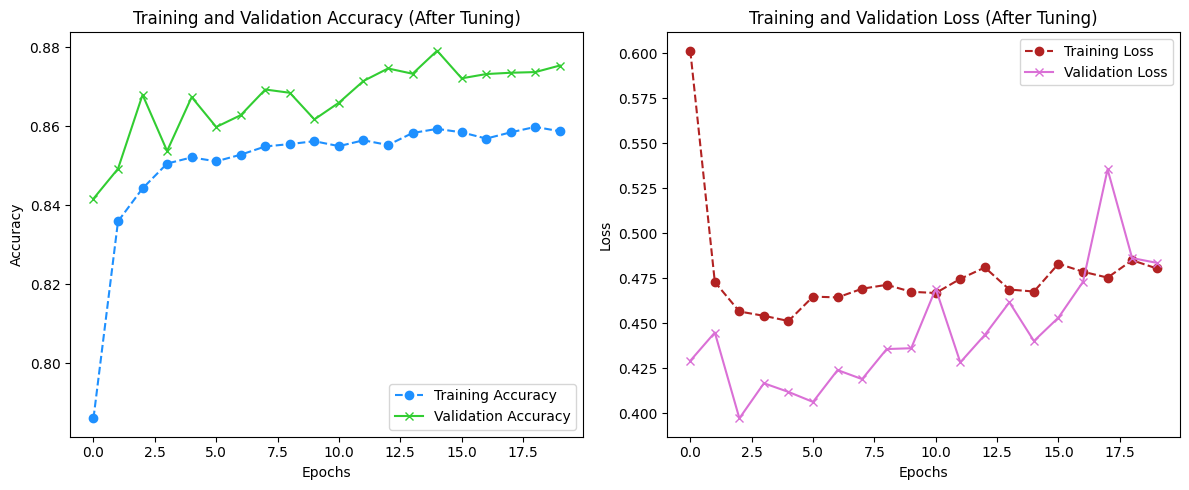

In [22]:
# Visualize Training and Validation Loss/Accuracy (After Tuning)
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='dodgerblue', linestyle='--', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='limegreen', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (After Tuning)')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='firebrick', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orchid', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (After Tuning)')

plt.tight_layout()  # Adjust spacing to fit subplots neatly
plt.show()


In [23]:
# Predict on Test Set
# Use the trained model to predict labels for the test set.
predictions = final_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


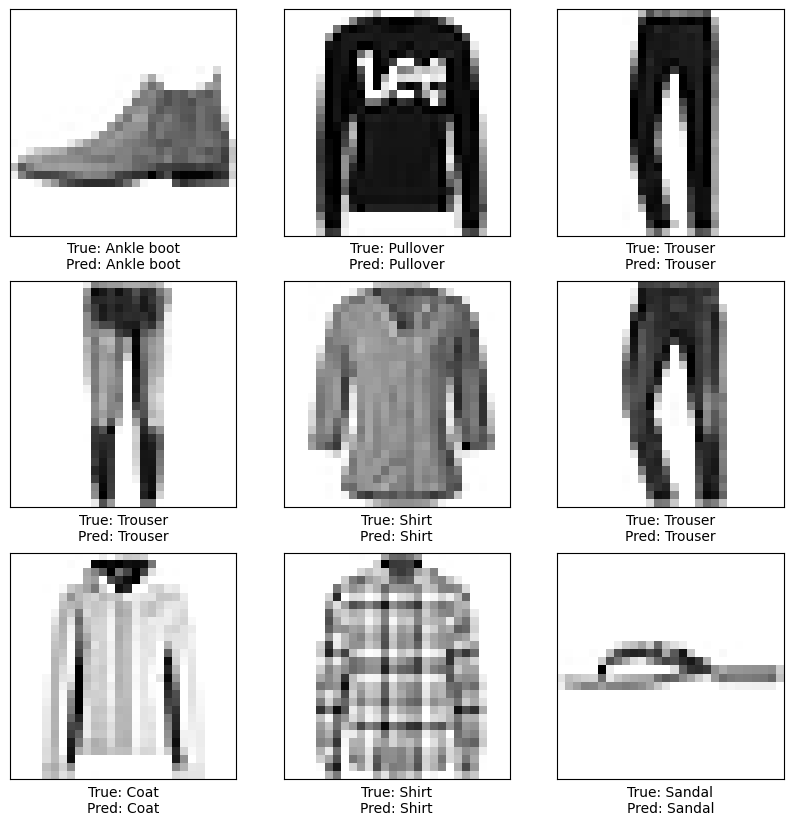

In [24]:
# Display a few sample predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPred: {class_names[np.argmax(predictions[i])]}" )
plt.show()